# Using GraphiPy to extract data from Reddit

In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# create GraphiPy object (default to Pandas)
graphipy = GraphiPy()

# Creating the Facebook Object

GraphiPy's Facebook object needs ACCESS_TOKEN, and ID in order to connect to Facebook's API:
- To get ACCESS_TOKEN, login to Reddit and go to https://developers.facebook.com/ and click the "Add New App" button at the top right corner of the page.
- ACCESS_TOKEN is an opaque string that identifies a user, app, or Page and can be used by the app to make graph API calls.
- ID can the facebook user id of anyone who grant the access to your app

In [3]:
# The facebook API needs these credentials
ACCESS_TOKEN = ""
ID = ""
facebook_api_credentials = {
    "access_token": ACCESS_TOKEN,
    "id": ID
}
# create the facebook object
facebook = graphipy.get_facebook(facebook_api_credentials)

# Get an user by id
### def fetch_facebook_user_info(graph, id)

Types of node returned:
- user

No edges returned

In [4]:
# Every function call modifies the graph that is sent as input
# user_graph = graphipy.create_graph("pandas")
# facebook.fetch_facebook_user_info(user_graph,facebook_api_credentials['id'])

# However, it also returns the graph modified so you can assign it to other variables like so:
user_graph = facebook.fetch_facebook_user_info(graphipy.create_graph(),facebook_api_credentials['id'])


In [5]:
# To get the list of available nodes
# However, there's only one type in this case
print(user_graph.get_nodes().keys())

dict_keys(['user'])


In [6]:
# You can get the dataframe from Pandas by specifying the node
user_df = user_graph.get_df("user")

In [7]:
user_df.head()

,Id,Label,label_attribute,name,email,gender,birthday,hometown
0,1543600752452807,Vincent Wu,user,Vincent Wu,466637857@qq.com,male,02/24/1996,Guiyang


In [8]:
# show the attributes of this node
user_df.iloc[0]

Id                 1543600752452807
Label                    Vincent Wu
label_attribute                user
name                     Vincent Wu
email              466637857@qq.com
gender                         male
birthday                 02/24/1996
hometown                    Guiyang
Name: 0, dtype: object

# Get posts of an user by id
###     def fetch_facebook_user_created_post(graph, id, limit=20)
Optional parameters:
- limit is the number of posts returned.

Types of node returned:
- user
- post

Types of edge returned: 
-  POSTED

In [9]:
# Facebook GraphiPy also supports the ability to get posts from an user
user_post_graph = graphipy.create_graph("pandas")
facebook.fetch_facebook_user_created_post(user_post_graph,facebook_api_credentials['id'])
nodes = user_post_graph.get_nodes()

In [10]:
# View the results
nodes["post"].head(100)

,Id,Label,label_attribute,created_time,creator_id,message,picture,caption
0,1543600752452807_1367868580026026,post_1543600752452807_1367868580026026,post,2018-03-01T08:21:18+0000,1543600752452807,None,https://scontent.xx.fbcdn.net/v/t1.0-9/p720x72...,None
1,1543600752452807_1367858486693702,post_1543600752452807_1367858486693702,post,2018-03-01T07:55:22+0000,1543600752452807,None,https://scontent.xx.fbcdn.net/v/t1.0-0/p480x48...,None
2,1543600752452807_1367858056693745,post_1543600752452807_1367858056693745,post,2018-03-01T07:54:05+0000,1543600752452807,None,https://scontent.xx.fbcdn.net/v/t1.0-9/p720x72...,None
3,1543600752452807_731749853637905,post_1543600752452807_731749853637905,post,2016-02-11T22:04:03+0000,1543600752452807,None,https://scontent.xx.fbcdn.net/v/t1.0-9/p720x72...,None
4,1543600752452807_776344222511801,post_1543600752452807_776344222511801,post,2015-09-30T01:50:06+0000,1543600752452807,None,https://scontent.xx.fbcdn.net/v/t1.0-9/p720x72...,None
5,1543600752452807_729922700487287,post_1543600752452807_729922700487287,post,2015-07-03T15:54:51+0000,1543600752452807,None,https://scontent.xx.fbcdn.net/v/t1.0-9/p720x72...,None
6,1543600752452807_691060451040179,post_1543600752452807_691060451040179,post,2015-04-28T02:22:43+0000,1543600752452807,None,https://scontent.xx.fbcdn.net/v/t1.0-9/1041663...,None
7,1543600752452807_351344755011752,post_1543600752452807_351344755011752,post,2013-10-12T04:55:09+0000,1543600752452807,None,https://scontent.xx.fbcdn.net/v/t31.0-8/s720x7...,None
8,1543600752452807_345397295606498,post_1543600752452807_345397295606498,post,2013-09-30T01:49:24+0000,1543600752452807,None,https://scontent.xx.fbcdn.net/v/t1.0-9/376245_...,None
9,1543600752452807_232348806911348,post_1543600752452807_232348806911348,post,2013-03-19T10:35:57+0000,1543600752452807,Happy Snow Day,None,None


In [11]:
# show the attributes of this node
nodes["post"].iloc[10]

Id                                  1543600752452807_217777561701806
Label                          post_1543600752452807_217777561701806
label_attribute                                                 post
created_time                                2013-02-26T03:07:03+0000
creator_id                                          1543600752452807
message                                                LEGO HAHA! :D
picture            https://scontent.xx.fbcdn.net/v/t1.0-0/p480x48...
caption                                                         None
Name: 10, dtype: object

# Find user's liked page by id
### def fetch_facebook_user_liked_pages(graph, id, limit=20)
Optional parameters:
- limit is the number of posts returned.

Types of node returned:
- user
- community

Types of edge returned: 
-  LIKED

In [12]:
# Facebook GraphiPy also supports the ability to get liked community of an user
user_liked_graph = graphipy.create_graph("pandas")
facebook.fetch_facebook_user_liked_pages(user_liked_graph,facebook_api_credentials['id'])
nodes = user_liked_graph.get_nodes()


In [13]:
# View the results
nodes["community"].head(100)

,Id,Label,label_attribute,about,description,category,website
0,209667505872982,USC ACM - Association for Computing Machinery,community,The USC chapter of ACM is actively involved in...,The Association for Computing Machinery is a w...,Education,http://www.uscacm.org
1,1856702814583128,Ray Allen,community,None,None,Athlete,www.ray34.com
2,124984464200434,USC Trojans,community,The Official Page of USC Athletics and Trojan ...,None,School Sports Team,http://www.usctrojans.com
3,45313835647,USC Viterbi School of Engineering,community,The USC Viterbi School of Engineering is ranke...,None,College & University,http://viterbi.usc.edu
4,1272480059489124,Goodful,community,Live well without obsessing about wellness.,"Recipes, fitness, DIY, and self-care routines ...",Media/News Company,https://www.buzzfeed.com/goodful?utm_term=.ekA...
5,1614251518827491,Tasty,community,"Food that'll make you close your eyes, lean ba...",Pinterest: http://bit.ly/tastypinss\nInstagram...,Media/News Company,https://tasty.co/
6,1745409155702358,Sustainable Cities Research Group UCONN,community,"Dedicated to interdisciplinary, use-inspired r...",The Sustainable Cities Research Group at UCONN...,Educational Research Center,None
7,134972803193847,University of Southern California,community,The official page of the University of Souther...,The University of Southern California is one o...,School,http://www.usc.edu
8,519355568130521,ClutchPoints,community,ClutchPoints is a mobile app to follow sports ...,ClutchPoints is one of the fastest growing soc...,Media,http://ClutchPoints.com
9,1407167032831912,Piques,community,Business: jonpaulpiques@gmail.com\n\nInstagram...,None,Comedian,instagram.com/piques


In [14]:
nodes["community"].iloc[0]

Id                                                   209667505872982
Label                  USC ACM - Association for Computing Machinery
label_attribute                                            community
about              The USC chapter of ACM is actively involved in...
description        The Association for Computing Machinery is a w...
category                                                   Education
website                                        http://www.uscacm.org
Name: 0, dtype: object

# Find post's comments by id
### def fetch_facebook_post_comments(graph, id, limit=20)
Optional parameters:
- limit is the number of posts returned.

Types of node returned:
- user
- post
- comment

Types of edge returned: 
-  COMMENTED

In [15]:
post_comment_graph = graphipy.create_graph("pandas")
facebook.fetch_facebook_post_comments(post_comment_graph,'1543600752452807_1367858056693745')
nodes = post_comment_graph.get_nodes()
nodes["comment"].head(100)

,Id,Label,label_attribute,created_time,creator_id,creator_name,message
0,1367868580026026_1367875200025364,1367868580026026_1367875200025364,comment,2018-03-01T08:40:20+0000,1543600752452807,Vincent Wu,cr to Anastasia Lulu Xu lol


# Export to CSV files
#### For more information, see DataExportDemo.ipynb

In [16]:
# You can then export the graph into .csv files
# Just call .export_all_csv() on the graph desired
csv_name = "facebook_post"
export_path_all = user_post_graph.export_all_csv(csv_name)

# You can also specify the dataframes "you want to export by using the .export_CSV() function
# Provide the label_attributes of the nodes and edges you want to export
csv_name = "facebook_post_specific"
nodes = {"user", "post"}
edges = {"posted"}
export_path_specific = user_post_graph.export_csv(csv_name, nodes, edges)

# Visualization with NetworkX
#### For more information, see DataExportDemo.ipynb

In [17]:
# We will visualize user_liked graph
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

In [18]:
# Create the networkx exporter object
exporter = graphipy.get_nx_exporter()
nx_graph = exporter.create_from_pd(user_liked_graph)

In [19]:
# # We will visualize user_liked_graph graph
# ul_nodes = user_liked_graph.get_nodes()
# ul_edges = user_liked_graph.get_edges()

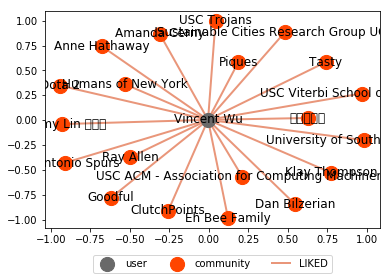

In [21]:
# Draw the graph using graphipy
color_set = set(mcolors.CSS4_COLORS)
options = {
    "node_label": "Label",
    "colorful_edges": True,
    "color_set": color_set
}
legend = exporter.draw_random(nx_graph, options=options, legend=plt)